In [ ]:
import pandas as pd
import numpy as np

In [15]:
encodings=['utf-8','latin1','ISO-8859-1','cp1252']

for encoding in encodings:
  try:
    df=pd.read_csv('spam.csv',encoding=encoding)
    print(f"read with the encoding:{encoding}")
    break
  except:
    print(f"falied to read with encoding: {encoding}")
    continue

if 'df' in locals():
  print("CSV LOADED IN LOCAL DIRECTORY")
else :
  print("FALIED TO LOAD CSV FILES WITH PROVIDED ENCODINGS")

falied to read with encoding: utf-8
read with the encoding:latin1
CSV LOADED IN LOCAL DIRECTORY


In [16]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4697,ham,Don no da:)whats you plan?,NaN,NaN,NaN
4529,ham,Don't forget though that I love you .... And I...,NaN,NaN,NaN
4300,ham,Are there TA jobs available? Let me know pleas...,NaN,NaN,NaN
4744,spam,Camera - You are awarded a SiPix Digital Camer...,NaN,NaN,NaN
4193,ham,Can not use foreign stamps in this country.,NaN,NaN,NaN


In [17]:
df.shape

(5572, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4869,ham,Dip's cell dead. So i m coming with him. U bet...,NaN,NaN,NaN
3403,ham,Then Ì_ ask dad to pick Ì_ up lar... ÌÏ wan 2 ...,NaN,NaN,NaN
4863,ham,Sorry da..today i wont come to play..i have dr...,NaN,NaN,NaN
638,ham,"What will we do in the shower, baby?",NaN,NaN,NaN
4349,ham,Yes. Rent is very expensive so its the way we ...,NaN,NaN,NaN


In [20]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(6)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
289,ham,"Dear,shall mail tonite.busy in the street,shal...",NaN,NaN,NaN
55,ham,Do you know what Mallika Sherawat did yesterda...,NaN,NaN,NaN
1553,ham,Ok how you dear. Did you call chechi,NaN,NaN,NaN
626,ham,How many licks does it take to get to the cent...,NaN,NaN,NaN
310,ham,Today is ACCEPT DAY..U Accept me as? Brother S...,NaN,NaN,NaN
27,ham,Did you catch the bus ? Are you frying an egg ...,NaN,NaN,NaN


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
2959,0,Sir send to group mail check it.,NaN,NaN,NaN
4204,1,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...,NaN,NaN,NaN
2403,0,Jesus christ bitch I'm trying to give you drug...,NaN,NaN,NaN
1984,1,Urgent! Please call 09061743810 from landline....,NaN,NaN,NaN
3742,0,"Nah, Wednesday. When should I bring the mini c...",NaN,NaN,NaN


In [22]:
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [23]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

NameError: name 'df' is not defined

In [24]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

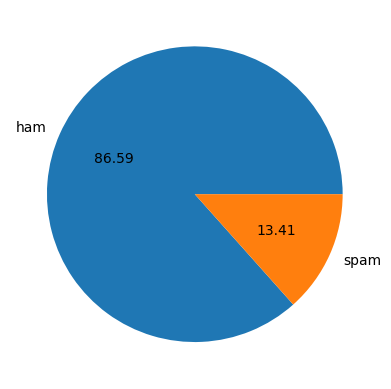

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [27]:
import nltk
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [28]:
X = df.iloc[:, 1:2]
y = df.iloc[:, 0:1]

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

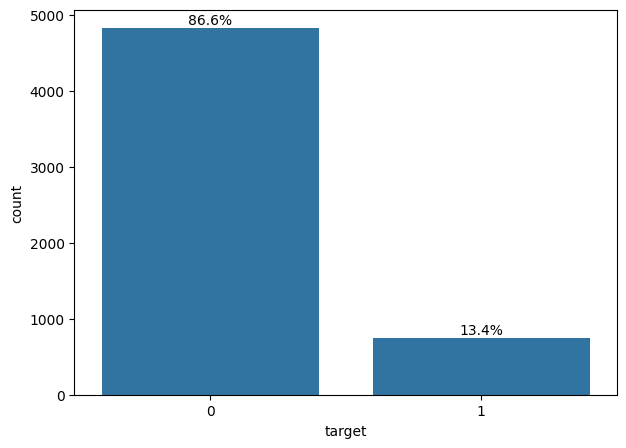

In [33]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="target", data=df)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(X))
    x_countplot = p.get_x() + p.get_width()/2
    y_countplot = p.get_height()+ 50
    ax.annotate(percentage, (x_countplot, y_countplot), ha='center')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values.ravel(),
    y.values.ravel(),
    test_size=0.20,
    random_state=42)

In [35]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [36]:
clf_method = KNeighborsClassifier()

clf_count_vectorizer = Pipeline([
     ('vectorizer', count_vectorizer),
     ('classifier', clf_method)
 ])

clf_count_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [37]:
Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [38]:
clf_tfidf_vectorizer = Pipeline([
     ('vectorizer', tfidf_vectorizer),
     ('classifier', clf_method)
 ])

clf_tfidf_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [39]:
y_train_pred_cvect = clf_count_vectorizer.predict(X_train)
y_train_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_train)


In [41]:
print(classification_report(y_train, y_train_pred_cvect))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3860
           1       0.99      0.81      0.89       597

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



In [42]:
print(classification_report(y_train, y_train_pred_tfidf_vect))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3860
           1       1.00      0.41      0.58       597

    accuracy                           0.92      4457
   macro avg       0.96      0.70      0.77      4457
weighted avg       0.93      0.92      0.91      4457



In [43]:
y_test_pred_cvect = clf_count_vectorizer.predict(X_test)
y_test_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_test)

print(f"Test Accuracy using Count Vectorizer: {accuracy_score(y_test, y_test_pred_cvect):.3f}")
print(f"Test Accuracy using TF-IDF Vectorizer: {accuracy_score(y_test, y_test_pred_tfidf_vect):.3f}")

Test Accuracy using Count Vectorizer: 0.968
Test Accuracy using TF-IDF Vectorizer: 0.916


In [44]:
print(classification_report(y_test, y_test_pred_cvect))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.97      0.78      0.87       150

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [45]:
print(classification_report(y_test, y_test_pred_tfidf_vect))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.37      0.54       150

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.75      1115
weighted avg       0.92      0.92      0.90      1115



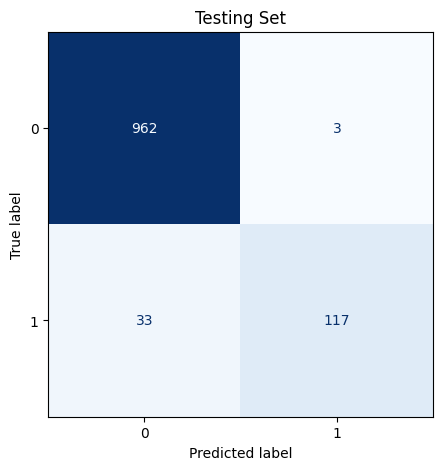

In [46]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_cvect))

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False);